In [0]:
#Neste projeto são utilizados dados do famigerado naufrágio do Titanic para criar insights sobre as variáveis que possuem importância para a 
#maior probabilidade de sobrevivência dos passageiros. Após isso as variáveis que não influenciam na sobrevivência dos passageiros serão retiradas
#e as outras variáveis serão "limpas" para posterior processo de analise de dados. 
#ESTE PROJETO TEM COMO OBJETIVO PROMOVER MAIS UMA DE MINHAS HABILIDADES RELACIONADAS A ENGENHARIA DE DADOS.
#Resumidamente: neste projeto carrego os dados em arquivos csv disponíveis no Kaggle. Nele utilizo funções da biblioteca Spark, comandos em SQL associados a funções Spark para consultas, biblioteca pandas para manipulação de dataframes e a biblioteca Matplotlib para plotar gráficos e retirar insights sobre a importÂncia de cada variável. Também é feita a tipagem, limpeza de colunas significativas e exclusão das que não tem significÂncia para analise da sobrevÊncia dos passageiros. 

In [0]:
#Nestas linhas são carregados dados dos arquivos retirados do Kaggle para os dataframes df1, df2 e df3.
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/marcelooliveiradevos@gmail.com/gender_submission.csv")
df2 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/marcelooliveiradevos@gmail.com/test.csv")
df3 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/marcelooliveiradevos@gmail.com/train.csv")

In [0]:
#Nestas linhas os dados dos dataframes são salvos em 3 arquivos de saída dentro das pastas apresentadas abaixo.
df1.write.format("csv").mode("overwrite").option("header", "true").save("/titanic/genero")
df2.write.format("csv").mode("overwrite").option("header", "true").save("/titanic/teste")
df3.write.format("csv").mode("overwrite").option("header", "true").save("/titanic/treino")

In [0]:
#As 3 variáveis abaixo são criadas com os dados salvos nos arquivos salvos nas linhas de códigos anteriores. Detalhe é que a função .distinct()
#da biblioteca Spark que facilmente retirar dados duplicados dos dataframes
df_genero = spark.read.format("csv").option("header", "true").load("/titanic/genero", sep = ",").distinct()
df_teste  = spark.read.format("csv").option("header", "true").load("/titanic/teste", sep = ",").distinct()
df_treino = spark.read.format("csv").option("header", "true").load("/titanic/treino", sep = ",").distinct()


In [0]:
#Nas 3 linhas a seguir são criadas 3 tabelas temporárias, as quais facilitam analises e consultas com códigos sql
df_genero.createOrReplaceTempView("genero")
df_teste.createOrReplaceTempView("teste")
df_treino.createOrReplaceTempView("treino")

In [0]:
%sql
--Neste código é feita uma pequena revisão rápida da tabela temporária dos dados de treino, os quais serão utilizados para insights
--nesta exploração de dados sumária. 
select * from treino

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,null,S
191,1,2,"Pinsky, Mrs. (Rosa)",female,32,0,0,234604,13,null,S
447,1,2,"Mellinger, Miss. Madeleine Violet",female,13,0,1,250644,19.5,null,S
720,0,3,"Johnson, Mr. Malkolm Joackim",male,33,0,0,347062,7.775,null,S
768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.75,null,Q
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,null
862,0,2,"Giles, Mr. Frederick Edward",male,21,1,0,28134,11.5,null,S
84,0,1,"Carrau, Mr. Francisco M",male,28,0,0,113059,47.1,null,S
109,0,3,"Rekic, Mr. Tido",male,38,0,0,349249,7.8958,null,S
356,0,3,"Vanden Steen, Mr. Leo Peter",male,28,0,0,345783,9.5,null,S


In [0]:
#No código a seguir são verificados dados nulos em cada uma das colunas. Observa-se que a coluna cabine está em quase totalmente 
#preenchida com dados nulos. Por esse motivo esta coluna será desconsiderada para analise de dados. 
#Para a coluna Age e Embarked os insights serão mostrados a seguir. 
#Na linha a seguir é importada a função coluna para manipulação das colunas com as funções spark
from pyspark.sql.functions import col
#O for verifica coluna por coluna a soma das lacunas nulas.
for coluna in df_treino.columns:
    num_null = df_treino.where(col(coluna).isNull()).count()
    print(f"O número de valores nulos na coluna {coluna} é: {num_null}")

O número de valores nulos na coluna PassengerId é: 0
O número de valores nulos na coluna Survived é: 0
O número de valores nulos na coluna Pclass é: 0
O número de valores nulos na coluna Name é: 0
O número de valores nulos na coluna Sex é: 0
O número de valores nulos na coluna Age é: 177
O número de valores nulos na coluna SibSp é: 0
O número de valores nulos na coluna Parch é: 0
O número de valores nulos na coluna Ticket é: 0
O número de valores nulos na coluna Fare é: 0
O número de valores nulos na coluna Cabin é: 687
O número de valores nulos na coluna Embarked é: 2


In [0]:
#É esperado pelo comportamento humano que a idade tenha influÊncia no nos sobrevivÊncia. Como o número de dados núlos está em torno de 19%, ainda é possível #utilizar a média de idade para preencher as lacunas.

#Na linha a seguir é feita a soma das colunas da idade onde nao há valeres nulos. Depois é dividido pela quantidade de números não nulos.
#Chega-se a média de 29,69 anos de idade média.
soma_idades = df_treino.where(col("Age").isNotNull()).agg({"Age": "sum"}).collect()[0][0]
print("A média das idades é", (soma_idades)/(891-177))

A média das idades é 29.69911764705882


In [0]:
#Na linha a seguir é importada a função when para aplicar o valor da média (29,69 ~ 30) aos espaços vazios.
from pyspark.sql.functions import when
#Na coluna a seguir a função when verifica quando a idade é nula e aplica a média quando for nula. Quando não for nula, mantém-se o resultado original
df_treino = df_treino.withColumn('Age', when(col('Age').isNull(), 30).otherwise(col('Age')))
#Imprime o resultado para conferÊncia
display(df_treino)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,null,S
191,1,2,"Pinsky, Mrs. (Rosa)",female,32,0,0,234604,13,null,S
447,1,2,"Mellinger, Miss. Madeleine Violet",female,13,0,1,250644,19.5,null,S
720,0,3,"Johnson, Mr. Malkolm Joackim",male,33,0,0,347062,7.775,null,S
768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.75,null,Q
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,null
862,0,2,"Giles, Mr. Frederick Edward",male,21,1,0,28134,11.5,null,S
84,0,1,"Carrau, Mr. Francisco M",male,28,0,0,113059,47.1,null,S
109,0,3,"Rekic, Mr. Tido",male,38,0,0,349249,7.8958,null,S
356,0,3,"Vanden Steen, Mr. Leo Peter",male,28,0,0,345783,9.5,null,S


In [0]:
%sql
-- Neste código é feita uma rápida consulta para se descobrir qual das portas mais pessoas embarcaram, ou seja, para se descobrir a 
-- moda em linguagem matemática. Neste caso verifica-se que a moda é "S": S=644, Q=77 e C=168. Provavelmente S era a entrada da terceira classe, porém 
-- pessoas de outras classes entraram por essa porta e provavelmente o mesmo ocorreu pelas outras portas de embarque.
SELECT 
    SUM(CASE WHEN Embarked = "C" THEN 1 ELSE 0 END) AS C,
    SUM(CASE WHEN Embarked = "Q" THEN 1 ELSE 0 END) AS Q,
    SUM(CASE WHEN Embarked = "S" THEN 1 ELSE 0 END) AS S
FROM treino

C,Q,S
168,77,644


In [0]:
#Importa a função matemática moda
from pyspark.sql.functions import mode
#apenas outra forma de encontrar a moda por meio de funções Spark.
moda_Embarked = df_treino.agg(mode(col('Embarked')).alias('moda_Embarked')).collect()[0]['moda_Embarked']
#imprime a moda, no caso embarque pela porta S
print('Moda da coluna Age:', moda_Embarked)

Moda da coluna Age: S


In [0]:
#Linha a seguir substitui nulos pela moda de embarque.
df_treino = df_treino.withColumn('Embarked', when(col('Embarked').isNull(), "S").otherwise(col('Embarked')))

#Cria uma variável auxiliar para verificar se há resultados nulos.
df_treino_Embarked = df_treino.filter(col('Embarked').isNull())
#Verifica na impressao se ha valores nulos, como nao imprime nada, conclui-se que nao ha valores nulos
display(df_treino_Embarked)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [0]:
#Instala a biblioteca missingno para analise das distribuição dos dados em histogramas. 
!pip install missingno

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-dd2dfce2-f246-464c-b688-2219e08999d6/bin/python -m pip install --upgrade pip' command.


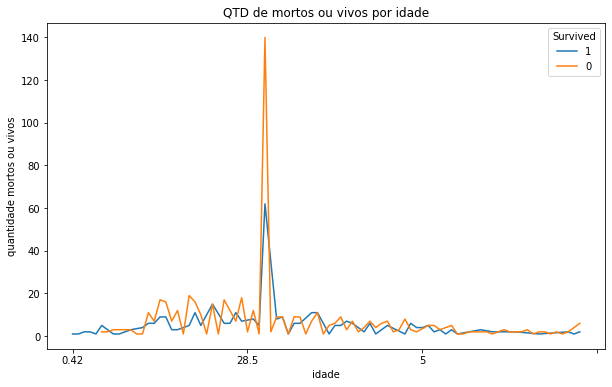

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-3981139444859109>:26
     24 plt.ylabel("quantidade mortos ou vivos")
     25 # definir os intervalos e os rótulos do eixo x
---> 26 plt.xticks(range(0, 91, 30), labels=['0-30', '30-60', '60-90'])
     28 # exibir o gráfico
     29 plt.show()

File /databricks/python/lib/python3.9/site-packages/matplotlib/pyplot.py:1795, in xticks(ticks, labels, **kwargs)
   1793         l.update(kwargs)
   1794 else:
-> 1795     labels = ax.set_xticklabels(labels, **kwargs)
   1797 return locs, labels

File /databricks/python/lib/python3.9/site-packages/matplotlib/axes/_base.py:75, in _axis_method_wrapper.__set_name__.<locals>.wrapper(self, *args, **kwargs)
     74 def wrapper(self, *args, **kwargs):
---> 75     return get_method(self)(*args, **kwargs)

File /databricks/python/lib/python3.9/site-packages/matplotlib/axis.py:1798, in Axis._

In [0]:
#importa biblioteca usada para analise das distribuição dos dados em histogramas. 
#importa biblioteca usada para utilizacao em gráficos
#utilizei pandas, pois nao consegui imprimir diretamento com variáveis do tipo spark.
import missingno                
import pandas as pd             
import seaborn as sns
import matplotlib.pyplot as plt

# converter o DataFrame Spark em um DataFrame pandas
df_pandas = df_treino.select('Age', 'Survived').toPandas()

# definir o tamanho da figura
plt.figure(figsize=(10, 6))

# agrupar os dados por idade e sobrevivência
data = df_pandas.groupby(['Age', 'Survived']).size().reset_index(name='counts')

# plotar o gráfico de linha com Seaborn
sns.lineplot(data=data, x='Age', y='counts', hue='Survived')

# adicionar título e rótulos dos eixos
plt.title("QTD de mortos ou vivos por idade")
plt.xlabel("idade")
plt.ylabel("quantidade mortos ou vivos")
# definir os intervalos e os rótulos do eixo x
plt.xticks(range(0, 91, 30), labels=['0-30', '30-60', '60-90'])

# exibir o gráfico
plt.show()

#Verifica-se que para idades abaixo até aproximadamente 11 anos há maior taxa de sobreviventes que de mortos. Isso é um indicativo
#da prioridade das crianças nos botes salva vidas. Aproximadamente 30 anos há maior discrepÂncia entre numero de mortos e vivos.
#Por outro lado por haver mais gente nesta idade e a probabilidade de sobreviver seja maior, há também mais pessoas que sobreviveram nesta 
#idade em números absolutos. Então sim, a idade importa.

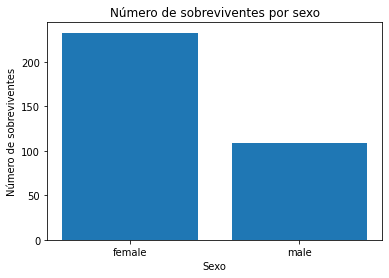

In [0]:


# Agrupa os dados por sexo e conta o número de sobreviventes em cada grupo
survivors_by_sex = df_treino.groupBy('Sex').agg({'Survived': 'sum'})

# Converte o resultado em um Pandas DataFrame
survivors_by_sex_pd = survivors_by_sex.toPandas()

# Cria um gráfico de barras com o número de sobreviventes pelo sexo
plt.bar(survivors_by_sex_pd['Sex'], survivors_by_sex_pd['sum(Survived)'])
plt.title('Número de sobreviventes por sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de sobreviventes')
plt.show()

#No gráfico de sobreviventes por idade observa-se uma discrepÂncia entre o número de sobreviventes homens e mulheres. Outra vez mostra-se 
#a prioridade das mulheres nos barcos salva vidas assim como as crianças.

In [0]:
#Neste código é aplicada um select em sql e o resultado é salvo em uma variável spark.
#O código soma o número de passageiros sobreviventes por classe e divide pelo total naquela classe. 
#O resultado é a probabilidade de sobrevivência por classe.
df_classe_survived = spark.sql("""
SELECT 
    SUM(CASE WHEN Pclass = "1" and Survived ="1" THEN 1 ELSE 0 END)*100/216 AS primeira,
    SUM(CASE WHEN Pclass = "2" and Survived ="1" THEN 1 ELSE 0 END)*100/184 AS segunda,
    SUM(CASE WHEN Pclass = "3" and Survived ="1" THEN 1 ELSE 0 END)*100/491 AS terceira
FROM treino
""")

#O display mostra que a probabilidade de sobrevivência é influenciada pela classe. O que era de se esperar, 
#as pessoas ricas tinham prioridade aos barcos salva vidas.
display(df_classe_survived)

primeira,segunda,terceira
62.96296296296296,47.28260869565217,24.236252545824847


In [0]:
#total por porta (para encontrar excluir and Survived ="1" e *100/denominador) : c=168; q=77; s=644
#É verificada a quantidade de sobreviventes por local de embarque. 
#Por bom senso nao vejo que o local de embarque influencie na possibilidade de sobreviver, porém como
#os números mostram uma variação vou manter a variável. No meu entender só há influencia, pois o local de 
#embarque esta ligado a classe -  esta sim é uma variável primária que influencia na taxa de sobrevivencia. 
df_porta_survived = spark.sql("""
SELECT 
    SUM(CASE WHEN Embarked = "C" and Survived ="1" THEN 1 ELSE 0 END)*100/168 AS C,
    SUM(CASE WHEN Embarked = "Q" and Survived ="1" THEN 1 ELSE 0 END)*100/77 AS Q,
    SUM(CASE WHEN Embarked = "S" and Survived ="1" THEN 1 ELSE 0 END)*100/644 AS S
FROM treino
""")

display(df_porta_survived)

C,Q,S
55.357142857142854,38.96103896103896,33.69565217391305


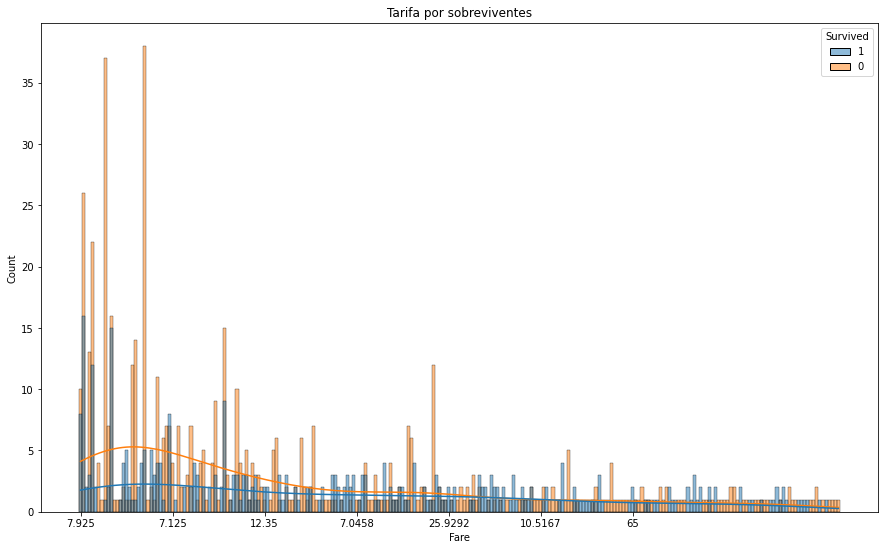

In [0]:
# converter o DataFrame Spark em um DataFrame pandas
df_pandas = df_treino.select('Fare', 'Survived').toPandas()

# definir o tamanho da figura
plt.figure(figsize=(15, 9))

sns.histplot(data=df_pandas, x="Fare", hue="Survived", kde=True)
plt.xticks(range(0, 200, 30))
plt.title("Tarifa por sobreviventes")
plt.show()

#Verifica-se, pelas linhas continuas, que há maior diferença entre o número de mortos e sobreviventes para tarifas mais baixas.
#Mais uma vez quem pagou a passagem mais cara tem maior chances de sobrevivencia. Na minha interpretacao mais uma influencia da variável primária classe.

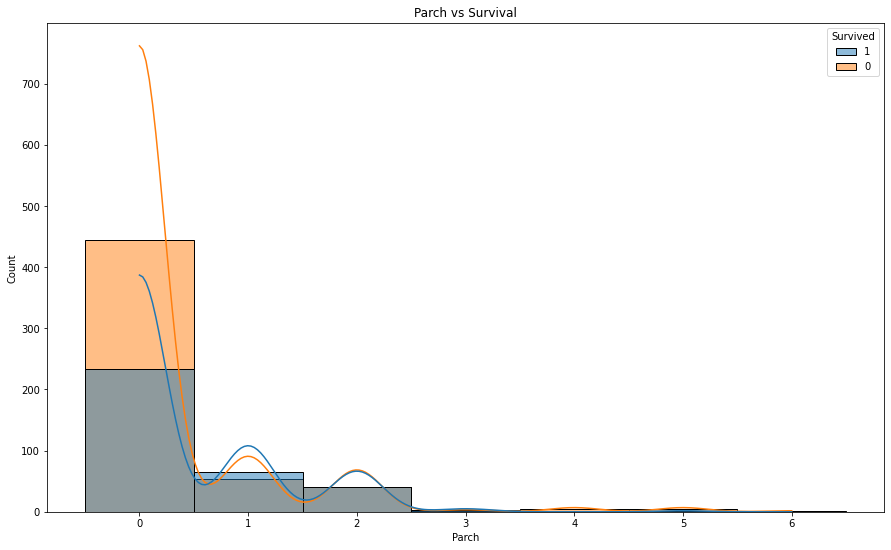

In [0]:
# converter o DataFrame Spark em um DataFrame pandas
df_pandas = df_treino.select('Parch', 'Survived').toPandas()

# definir o tamanho da figura
plt.figure(figsize=(15, 9))

sns.histplot(data=df_pandas, x="Parch", hue="Survived", kde=True)
#plt.xticks(range(0, 200, 30))
plt.title("Parch vs Survival")
plt.show()
#Observa-se que quem nao tem nenhum vinculo com pais ou filhos tem maior probabilidade de morrer. Já quem tem a ligacao com um filho ou pai tem maior chance de #sobreviver a primeira vista. Talvez relacionada ao esforço dos pais em salvar os filhos e se salvarem para proteger os filhos.

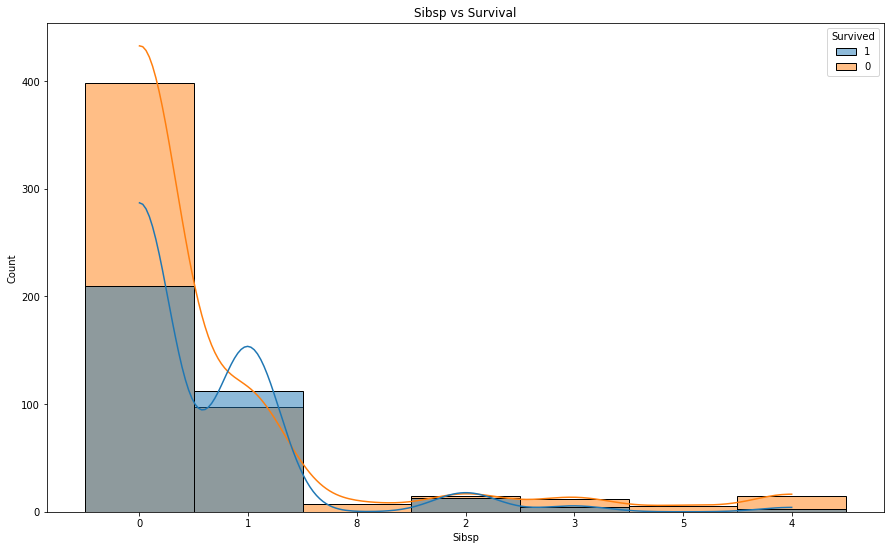

In [0]:
#Observa-se que quem nao tem nenhum vinculo com irmão tem maior probabilidade de morrer. Já quem tem a ligacao com irmaos  tem maior chance de #sobreviver a #primeira vista. Mesma logica dos pais.

# converter o DataFrame Spark em um DataFrame pandas
df_pandas = df_treino.select('Sibsp', 'Survived').toPandas()

# definir o tamanho da figura
plt.figure(figsize=(15, 9))

sns.histplot(data=df_pandas, x="Sibsp", hue="Survived", kde=True)
#plt.xticks(range(0, 200, 30))#, labels=['0-30', '30-60', '60-90'])
plt.title("Sibsp vs Survival")
plt.show()

In [0]:
#POR FIM, APÓS UMA ANALISE PRELIMINAR DA INFLUÊNCIA DE CADA VARIÁVEL NA TAXA DE SOBREVIVENTES, AS VARIÁVEIS "name", "ticket", "cabin", "passengerid" FORAM DROPADAS COM RELACAO AOS DADOS DE TREINO (JÁ PARA OS DADOS DE TESTE FOI FEITO O MESMO COM EXCEÇÃO DA VARIÁVEL passengerid A QUAL SERVIRÁ COMO REFERÊNCIA PARA VERIFICAR OS RESULTADOS). PARA CADA VARIÁVEL FOI FEITA A TIPAGEM DOS DADOS DE ACORDO COM A COLUNA. O MESMO DEVERÁ SER FEITO COM OS DADOS DE TESTE. A PARTIR DAQUI O TRABALHO DE ANALISE DE DADOS É SERVIÇO DO ANALISTA DE DADOS.
from pyspark.sql.types import FloatType, IntegerType
type(df_treino)
df_treino = df_treino.drop("name", "ticket", "cabin", "passengerid")
df_treino = df_treino.withColumn("Age", df_treino["Age"].cast(FloatType()))
df_treino = df_treino.withColumn("Fare", df_treino["Fare"].cast(FloatType()))
df_treino = df_treino.withColumn("Survived", df_treino["Survived"].cast(IntegerType()))
df_treino = df_treino.withColumn("SibSp", df_treino["SibSp"].cast(IntegerType()))
df_treino = df_treino.withColumn("Parch", df_treino["Parch"].cast(IntegerType()))
df_treino = df_treino.withColumn("Pclass", df_treino["Pclass"].cast(IntegerType()))

In [0]:

display(df_treino)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,3,female,26.0,0,0,7.925,S
1,2,female,32.0,0,0,13.0,S
1,2,female,13.0,0,1,19.5,S
0,3,male,33.0,0,0,7.775,S
0,3,female,30.5,0,0,7.75,Q
1,1,female,62.0,0,0,80.0,S
0,2,male,21.0,1,0,11.5,S
0,1,male,28.0,0,0,47.1,S
0,3,male,38.0,0,0,7.8958,S
0,3,male,28.0,0,0,9.5,S


In [0]:
type(df_treino)

Out[37]: pyspark.sql.dataframe.DataFrame

In [0]:
import pyspark.sql.functions as F

# Salva o dataframe como um arquivo CSV no caminho /titanic/treino com o nome de arquivo "dados_treino.csv"
df_treino.write.format("csv").option("header",True).mode("overwrite").option("path", "/titanic/treino/dados_treino.csv").save()

#A limpeza foi aplicada apenas para os dados de treino, porque para os dados de resultado não é necessário e para os dados de teste o processo é praticamente identico. Exceto que no caso não é necessário aplicar a analise preliminar dos dados, bastando apenas "limpar" as colunas úteis e dropar as inúteis. 